<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Spark Dataframes

*Authors: Adapted and modified from Dave Yerrington (SF) by Christoph Rahmede (LDN)*

---

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spark-has-an-SQL-interface-into-dataframes-like-Hive" data-toc-modified-id="Spark-has-an-SQL-interface-into-dataframes-like-Hive-1">Spark has an SQL interface into dataframes like <em>Hive</em></a></span></li><li><span><a href="#Spark-data-types" data-toc-modified-id="Spark-data-types-2">Spark data types</a></span><ul class="toc-item"><li><span><a href="#RDD's" data-toc-modified-id="RDD's-2.1">RDD's</a></span></li><li><span><a href="#DataFrames" data-toc-modified-id="DataFrames-2.2">DataFrames</a></span></li><li><span><a href="#Common-DataFrame-operations-and-characteristics" data-toc-modified-id="Common-DataFrame-operations-and-characteristics-2.3">Common DataFrame operations and characteristics</a></span><ul class="toc-item"><li><span><a href="#Inspect-variable-/-column-space-of-a-DataFrame" data-toc-modified-id="Inspect-variable-/-column-space-of-a-DataFrame-2.3.1">Inspect variable / column space of a DataFrame</a></span></li><li><span><a href="#DTypes" data-toc-modified-id="DTypes-2.3.2">DTypes</a></span></li><li><span><a href="#Explain-DataFrame" data-toc-modified-id="Explain-DataFrame-2.3.3">Explain DataFrame</a></span></li><li><span><a href="#Describe" data-toc-modified-id="Describe-2.3.4">Describe</a></span></li><li><span><a href="#printSchema" data-toc-modified-id="printSchema-2.3.5">printSchema</a></span></li><li><span><a href="#Count" data-toc-modified-id="Count-2.3.6">Count</a></span></li></ul></li><li><span><a href="#Some-basic-stats-in-spark" data-toc-modified-id="Some-basic-stats-in-spark-2.4">Some basic stats in spark</a></span><ul class="toc-item"><li><span><a href="#Covariance" data-toc-modified-id="Covariance-2.4.1">Covariance</a></span></li><li><span><a href="#Pearson-correlation" data-toc-modified-id="Pearson-correlation-2.4.2">Pearson correlation</a></span></li></ul></li><li><span><a href="#Limiting-results" data-toc-modified-id="Limiting-results-2.5">Limiting results</a></span><ul class="toc-item"><li><span><a href="#Head" data-toc-modified-id="Head-2.5.1">Head</a></span></li><li><span><a href="#Show-limited-results" data-toc-modified-id="Show-limited-results-2.5.2">Show limited results</a></span></li></ul></li><li><span><a href="#-Why-should-you-need-to-be-careful-when-displaying-data-in-Spark?" data-toc-modified-id="-Why-should-you-need-to-be-careful-when-displaying-data-in-Spark?-2.6"><i class="fa fa-question-circle"></i> Why should you need to be careful when displaying data in Spark?</a></span></li><li><span><a href="#More-DataFrame-and-Series-operations" data-toc-modified-id="More-DataFrame-and-Series-operations-2.7">More DataFrame and Series operations</a></span><ul class="toc-item"><li><span><a href="#Transform-dataframe-to-RDD" data-toc-modified-id="Transform-dataframe-to-RDD-2.7.1">Transform dataframe to RDD</a></span></li><li><span><a href="#Convert-from-list-of-Row-objects-to-list-of-dictionaries" data-toc-modified-id="Convert-from-list-of-Row-objects-to-list-of-dictionaries-2.7.2">Convert from list of Row objects to list of dictionaries</a></span></li><li><span><a href="#Selecting-DataFrame-Series" data-toc-modified-id="Selecting-DataFrame-Series-2.7.3">Selecting DataFrame Series</a></span></li><li><span><a href="#Select-all-features-/-variables-/-columns" data-toc-modified-id="Select-all-features-/-variables-/-columns-2.7.4">Select all features / variables / columns</a></span></li><li><span><a href="#Select-specific-features-/-variables-/-columns" data-toc-modified-id="Select-specific-features-/-variables-/-columns-2.7.5">Select specific features / variables / columns</a></span></li><li><span><a href="#Series-Operations" data-toc-modified-id="Series-Operations-2.7.6">Series Operations</a></span></li><li><span><a href="#As-an-&quot;alias&quot;" data-toc-modified-id="As-an-&quot;alias&quot;-2.7.7">As an "alias"</a></span></li><li><span><a href="#Creating-new-features-/-variables-/-columns" data-toc-modified-id="Creating-new-features-/-variables-/-columns-2.7.8">Creating new features / variables / columns</a></span></li></ul></li><li><span><a href="#-Have-we-changed-the-original-DataFrame?" data-toc-modified-id="-Have-we-changed-the-original-DataFrame?-2.8"><i class="fa fa-question-circle"></i> Have we changed the original DataFrame?</a></span><ul class="toc-item"><li><span><a href="#Filtering-Data" data-toc-modified-id="Filtering-Data-2.8.1">Filtering Data</a></span></li><li><span><a href="#Multiple-conditions" data-toc-modified-id="Multiple-conditions-2.8.2">Multiple conditions</a></span></li><li><span><a href="#Filter-as-an-expression" data-toc-modified-id="Filter-as-an-expression-2.8.3">Filter as an expression</a></span></li><li><span><a href="#Sorting" data-toc-modified-id="Sorting-2.8.4">Sorting</a></span></li><li><span><a href="#Creating-a-histogram-from-a-column" data-toc-modified-id="Creating-a-histogram-from-a-column-2.8.5">Creating a histogram from a column</a></span></li></ul></li><li><span><a href="#AS-SQL!?" data-toc-modified-id="AS-SQL!?-2.9">AS SQL!?</a></span><ul class="toc-item"><li><span><a href="#1.-Temporary-Views-select-DataFrames" data-toc-modified-id="1.-Temporary-Views-select-DataFrames-2.9.1">1. Temporary Views select DataFrames</a></span></li><li><span><a href="#2.-Check-out-the-dataset-with-infer-schema-parameter-but-without-header." data-toc-modified-id="2.-Check-out-the-dataset-with-infer-schema-parameter-but-without-header.-2.9.2">2. Check out the dataset with infer schema parameter but without header.</a></span></li><li><span><a href="#3.--Select-the-first-100-table-rows-using-SQL" data-toc-modified-id="3.--Select-the-first-100-table-rows-using-SQL-2.9.3">3.  Select the first 100 table rows using SQL</a></span></li><li><span><a href="#4.a-Which-is-the-strongest-Pokemon-by-Type?" data-toc-modified-id="4.a-Which-is-the-strongest-Pokemon-by-Type?-2.9.4">4.a Which is the strongest Pokemon by <code>Type</code>?</a></span></li><li><span><a href="#4.b-Which-is-the-strongest-Pokemon-by-Type?" data-toc-modified-id="4.b-Which-is-the-strongest-Pokemon-by-Type?-2.9.5">4.b Which is the strongest Pokemon by Type?</a></span></li><li><span><a href="#5.a-Which-Pokemon-has-the-best-combined-Attack-and-Defence?" data-toc-modified-id="5.a-Which-Pokemon-has-the-best-combined-Attack-and-Defence?-2.9.6">5.a Which Pokemon has the best combined Attack and Defence?</a></span></li><li><span><a href="#5.b-Which-Pokemon-has-the-best-combined-Attack-and-Defence?" data-toc-modified-id="5.b-Which-Pokemon-has-the-best-combined-Attack-and-Defence?-2.9.7">5.b Which Pokemon has the best combined Attack and Defence?</a></span></li><li><span><a href="#6.-Create-a-new-feature-called-&quot;Pokevalue&quot;-that-is-the-combined-Attack,-Defense-and-scaled-by-.2-of-the-Pokemon-HP." data-toc-modified-id="6.-Create-a-new-feature-called-&quot;Pokevalue&quot;-that-is-the-combined-Attack,-Defense-and-scaled-by-.2-of-the-Pokemon-HP.-2.9.8">6. Create a new feature called "Pokevalue" that is the combined Attack, Defense and scaled by .2 of the Pokemon HP.</a></span></li></ul></li></ul></li></ul></div>

## Spark has an SQL interface into dataframes like _Hive_

Spark isn't exactly **Hive**, but it uses components from Hive.  You can use temporary SQL views with Spark dataframes.

>```python
># Load a dataset as a Spark DataFrame
>df = spark.read.csv("datasets/somedataset/hamburgers_eaten_per_hour.csv")
>df.createOrReplaceTempView("hamburgers")
>```



Then you can slice and dice your dataframe with SQL:

>```python
>spark.sql("SELECT * FROM hamburgers").show()
>
># +------+---------+
># | eaten|     name|
># +------+---------+
># |null  |     Jeff|
># |  30  |   Kiefer|
># |  19  |     Hang|
># +------+---------+
>```

## Spark data types
---

### RDD's

It's best to think of RDDs as primitive objects that are distributed.  RDDs can contain any type of Python, Java, or Scala objects, including user-defined classes.  

### DataFrames

The big difference between RDD's and DataFrames is that DataFrames introduce the idea of a "schema" much like Pandas.  

The big plus is that Spark DataFrames serialize data at a lower level to native Java/Scala, so when it's passed between nodes, it's much more performant, requiring fewer processes to handle computations.  Mainly data can be processed faster when it's optimized to a common format (the schema) that Spark doesn't have to convert to in order to perform tasks on it.

Outside of the performance optimizations introduced with a schema-based datastructure, the **DataFrame API** provides a convenient set of selectors for transforming data, much like Pandas.  Lastly, it's possible to create temporary views in which **DataFrames** can be queried with SQL - **SparkSQL**.

In [1]:
import pyspark as ps
sc = ps.SparkContext("local")
spark = ps.sql.SparkSession(sc)

In [2]:
df = spark.read.csv(
    path="data/pokedex_basic.csv",
    header=True,
    # Poorly formed rows in CSV are dropped rather than erroring entire operation
    mode="DROPMALFORMED",
    # Not always perfect but works well in most cases as of 2.1+
    inferSchema=True
)

df.printSchema()

root
 |-- PokedexNumber: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Total: integer (nullable = true)
 |-- HP: integer (nullable = true)
 |-- Attack: integer (nullable = true)
 |-- Defense: integer (nullable = true)
 |-- SpecialAttack: integer (nullable = true)
 |-- SpecialDefense: integer (nullable = true)
 |-- Speed: integer (nullable = true)



In [3]:
df

DataFrame[PokedexNumber: int, Name: string, Type: string, Total: int, HP: int, Attack: int, Defense: int, SpecialAttack: int, SpecialDefense: int, Speed: int]

To see the dataframe, we have to use the command `.show()`. It will limit to 20 rows by default.

In [4]:
df.show(10)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            1|           Bulbasaur|GrassPoison|  318| 45|    49|     49|           65|            65|   45|
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            4|          Charmander|       Fire|  309| 39|    52|     43|           60|            50|   65|
|            5|          Charmeleon|       Fire|  405| 58|    64|     58|           80|            65|   80|
|            6|    

### Common DataFrame operations and characteristics
---

Let's have a look at some familiar and new functions and properties.

#### Inspect variable / column space of a DataFrame

In [5]:
df.columns

['PokedexNumber',
 'Name',
 'Type',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'SpecialAttack',
 'SpecialDefense',
 'Speed']

#### DTypes

Inspect schema programmatically.

In [6]:
df.dtypes

[('PokedexNumber', 'int'),
 ('Name', 'string'),
 ('Type', 'string'),
 ('Total', 'int'),
 ('HP', 'int'),
 ('Attack', 'int'),
 ('Defense', 'int'),
 ('SpecialAttack', 'int'),
 ('SpecialDefense', 'int'),
 ('Speed', 'int')]

#### Explain DataFrame
Show details about DataFrame type, schema, and origin of data.

In [7]:
df.explain()

== Physical Plan ==
FileScan csv [PokedexNumber#16,Name#17,Type#18,Total#19,HP#20,Attack#21,Defense#22,SpecialAttack#23,SpecialDefense#24,Speed#25] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex[file:/Users/crahmede/GA_files/DSI-LDN-2/DSI-crahm/pyspark-lessons/spark-datafra..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<PokedexNumber:int,Name:string,Type:string,Total:int,HP:int,Attack:int,Defense:int,SpecialA...




#### Describe
Describe will look similar to the synonymous Pandas **describe** function.

In [8]:
df.describe().show()

+-------+------------------+----------------+----------+------------------+------------------+-----------------+------------------+----------------+-----------------+------------------+
|summary|     PokedexNumber|            Name|      Type|             Total|                HP|           Attack|           Defense|   SpecialAttack|   SpecialDefense|             Speed|
+-------+------------------+----------------+----------+------------------+------------------+-----------------+------------------+----------------+-----------------+------------------+
|  count|               800|             800|       800|               800|               800|              800|               800|             800|              800|               800|
|   mean|         362.81375|            null|      null|          435.1025|          69.25875|         79.00125|           73.8425|           72.82|          71.9025|           68.2775|
| stddev|208.34379756406656|            null|      null|119.9630397555

In [9]:
df.describe().toPandas()

,summary,PokedexNumber,Name,Type,Total,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed
0,count,800,800,800,800,800,800,800,800,800,800
1,mean,362.81375,None,None,435.1025,69.25875,79.00125,73.8425,72.82,71.9025,68.2775
2,stddev,208.34379756406656,None,None,119.96303975551908,25.534669032332076,32.45736586949845,31.183500559332924,32.7222941688016,27.82891579711746,29.060473717161447
3,min,1,Abomasnow,Bug,180,1,5,5,10,20,5
4,max,721,Zygarde50% Forme,WaterSteel,780,255,190,230,194,230,180


In [10]:
# Check Pandas version here!!!
df.toPandas().describe()

,PokedexNumber,Total,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


#### printSchema
The schema is a very import characteristic of a Spark DataFrame.  It tells us what's possible in terms of transformation.  Also, it's the reason DataFrames are so fast since they are typed to a set number of types that are serialized and optimized in Java/Scala behind the scenes.

><i class="fa fa-exclamation-triangle" aria-hidden="true"></i> The "schema" that we've been so excited to see is finally here to explore.  Feel free to take a screenshot and show your friends.

In [11]:
df.printSchema()

root
 |-- PokedexNumber: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Total: integer (nullable = true)
 |-- HP: integer (nullable = true)
 |-- Attack: integer (nullable = true)
 |-- Defense: integer (nullable = true)
 |-- SpecialAttack: integer (nullable = true)
 |-- SpecialDefense: integer (nullable = true)
 |-- Speed: integer (nullable = true)



#### Count
Count with caveat:  This will return the count of all rows, including _non-NaN_ values.  Pandas will omit these.

In [12]:
df.count()

800

### Some basic stats in spark
---

#### Covariance

In [13]:
df.cov("Attack", "Defense")

444.0102096370468

#### Pearson correlation

In [14]:
df.corr("Attack", "Defense")

0.4386870551184902

### Limiting results

---

#### Head

In [15]:
# all the data is loaded into an instance's memory -- use for small datasets
df.head(5)

[Row(PokedexNumber=1, Name='Bulbasaur', Type='GrassPoison', Total=318, HP=45, Attack=49, Defense=49, SpecialAttack=65, SpecialDefense=65, Speed=45),
 Row(PokedexNumber=2, Name='Ivysaur', Type='GrassPoison', Total=405, HP=60, Attack=62, Defense=63, SpecialAttack=80, SpecialDefense=80, Speed=60),
 Row(PokedexNumber=3, Name='Venusaur', Type='GrassPoison', Total=525, HP=80, Attack=82, Defense=83, SpecialAttack=100, SpecialDefense=100, Speed=80),
 Row(PokedexNumber=3, Name='VenusaurMega Venusaur', Type='GrassPoison', Total=625, HP=80, Attack=100, Defense=123, SpecialAttack=122, SpecialDefense=120, Speed=80),
 Row(PokedexNumber=4, Name='Charmander', Type='Fire', Total=309, HP=39, Attack=52, Defense=43, SpecialAttack=60, SpecialDefense=50, Speed=65)]

#### Show limited results

With Pandas we're used to the `df.head()` as a first step in exploring a dataset.  With Spark this isn't exactly the same.  You need to use the `df.show()` operation in order to explore data as a first step.  Where Pandas formats its DataFrame output for display in nice HTML tables with sensible defaults for output, you have to be a bit more specific about what you're looking at with `show()` when using Spark.


> The parameter `truncate` is helpful for truncating attributes for display.

In [16]:
df.show(6)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            1|           Bulbasaur|GrassPoison|  318| 45|    49|     49|           65|            65|   45|
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            4|          Charmander|       Fire|  309| 39|    52|     43|           60|            50|   65|
|            5|          Charmeleon|       Fire|  405| 58|    64|     58|           80|            65|   80|
+-------------+----

In [17]:
df.show(5, truncate=8)

+-------------+--------+--------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|    Name|    Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------+--------+-----+---+------+-------+-------------+--------------+-----+
|            1|Bulba...|Grass...|  318| 45|    49|     49|           65|            65|   45|
|            2| Ivysaur|Grass...|  405| 60|    62|     63|           80|            80|   60|
|            3|Venusaur|Grass...|  525| 80|    82|     83|          100|           100|   80|
|            3|Venus...|Grass...|  625| 80|   100|    123|          122|           120|   80|
|            4|Charm...|    Fire|  309| 39|    52|     43|           60|            50|   65|
+-------------+--------+--------+-----+---+------+-------+-------------+--------------+-----+
only showing top 5 rows



In [18]:
df.limit(19).show()
# `show()` can also be chained to certain outputs like `limit`.
# `show` by itself is a compound operation for displaying data.

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            1|           Bulbasaur|GrassPoison|  318| 45|    49|     49|           65|            65|   45|
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            4|          Charmander|       Fire|  309| 39|    52|     43|           60|            50|   65|
|            5|          Charmeleon|       Fire|  405| 58|    64|     58|           80|            65|   80|
|            6|    

### <i class="fa fa-question-circle" aria-hidden="true"></i> Why should you need to be careful when displaying data in Spark?

Hopefully you can see why Pandas is so nice to use for EDA.

### More DataFrame and Series operations
---

#### Transform dataframe to RDD

In [19]:
df.rdd.take(5)

[Row(PokedexNumber=1, Name='Bulbasaur', Type='GrassPoison', Total=318, HP=45, Attack=49, Defense=49, SpecialAttack=65, SpecialDefense=65, Speed=45),
 Row(PokedexNumber=2, Name='Ivysaur', Type='GrassPoison', Total=405, HP=60, Attack=62, Defense=63, SpecialAttack=80, SpecialDefense=80, Speed=60),
 Row(PokedexNumber=3, Name='Venusaur', Type='GrassPoison', Total=525, HP=80, Attack=82, Defense=83, SpecialAttack=100, SpecialDefense=100, Speed=80),
 Row(PokedexNumber=3, Name='VenusaurMega Venusaur', Type='GrassPoison', Total=625, HP=80, Attack=100, Defense=123, SpecialAttack=122, SpecialDefense=120, Speed=80),
 Row(PokedexNumber=4, Name='Charmander', Type='Fire', Total=309, HP=39, Attack=52, Defense=43, SpecialAttack=60, SpecialDefense=50, Speed=65)]

#### Convert from list of Row objects to list of dictionaries

In [20]:
[row.asDict() for row in df.take(10)]

[{'PokedexNumber': 1,
  'Name': 'Bulbasaur',
  'Type': 'GrassPoison',
  'Total': 318,
  'HP': 45,
  'Attack': 49,
  'Defense': 49,
  'SpecialAttack': 65,
  'SpecialDefense': 65,
  'Speed': 45},
 {'PokedexNumber': 2,
  'Name': 'Ivysaur',
  'Type': 'GrassPoison',
  'Total': 405,
  'HP': 60,
  'Attack': 62,
  'Defense': 63,
  'SpecialAttack': 80,
  'SpecialDefense': 80,
  'Speed': 60},
 {'PokedexNumber': 3,
  'Name': 'Venusaur',
  'Type': 'GrassPoison',
  'Total': 525,
  'HP': 80,
  'Attack': 82,
  'Defense': 83,
  'SpecialAttack': 100,
  'SpecialDefense': 100,
  'Speed': 80},
 {'PokedexNumber': 3,
  'Name': 'VenusaurMega Venusaur',
  'Type': 'GrassPoison',
  'Total': 625,
  'HP': 80,
  'Attack': 100,
  'Defense': 123,
  'SpecialAttack': 122,
  'SpecialDefense': 120,
  'Speed': 80},
 {'PokedexNumber': 4,
  'Name': 'Charmander',
  'Type': 'Fire',
  'Total': 309,
  'HP': 39,
  'Attack': 52,
  'Defense': 43,
  'SpecialAttack': 60,
  'SpecialDefense': 50,
  'Speed': 65},
 {'PokedexNumber': 5,

In [21]:
df_pd = df.toPandas()

In [22]:
df_pd.iloc[:10].T.to_dict().values()

dict_values([{'PokedexNumber': 1, 'Name': 'Bulbasaur', 'Type': 'GrassPoison', 'Total': 318, 'HP': 45, 'Attack': 49, 'Defense': 49, 'SpecialAttack': 65, 'SpecialDefense': 65, 'Speed': 45}, {'PokedexNumber': 2, 'Name': 'Ivysaur', 'Type': 'GrassPoison', 'Total': 405, 'HP': 60, 'Attack': 62, 'Defense': 63, 'SpecialAttack': 80, 'SpecialDefense': 80, 'Speed': 60}, {'PokedexNumber': 3, 'Name': 'Venusaur', 'Type': 'GrassPoison', 'Total': 525, 'HP': 80, 'Attack': 82, 'Defense': 83, 'SpecialAttack': 100, 'SpecialDefense': 100, 'Speed': 80}, {'PokedexNumber': 3, 'Name': 'VenusaurMega Venusaur', 'Type': 'GrassPoison', 'Total': 625, 'HP': 80, 'Attack': 100, 'Defense': 123, 'SpecialAttack': 122, 'SpecialDefense': 120, 'Speed': 80}, {'PokedexNumber': 4, 'Name': 'Charmander', 'Type': 'Fire', 'Total': 309, 'HP': 39, 'Attack': 52, 'Defense': 43, 'SpecialAttack': 60, 'SpecialDefense': 50, 'Speed': 65}, {'PokedexNumber': 5, 'Name': 'Charmeleon', 'Type': 'Fire', 'Total': 405, 'HP': 58, 'Attack': 64, 'Defen

#### Selecting DataFrame Series

Selecting variables with Spark **DataFrames API** works very similarly to Pandas DataFrames.  When selecting variables in Pandas use a `list` object, passed to a DataFrame object via `[]` brackets like so:

>```df[['col1', 'col2']]```

The equivalent in spark is using the `.select()` method which takes flat parameters.

#### Select all features / variables / columns

In [23]:
df.select(df.columns)

DataFrame[PokedexNumber: int, Name: string, Type: string, Total: int, HP: int, Attack: int, Defense: int, SpecialAttack: int, SpecialDefense: int, Speed: int]

In [24]:
df.select(df.columns).show(5)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            1|           Bulbasaur|GrassPoison|  318| 45|    49|     49|           65|            65|   45|
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            4|          Charmander|       Fire|  309| 39|    52|     43|           60|            50|   65|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
only showing top 5 

#### Select specific features / variables / columns

In [25]:
df.select("Attack", "Defense").show()

+------+-------+
|Attack|Defense|
+------+-------+
|    49|     49|
|    62|     63|
|    82|     83|
|   100|    123|
|    52|     43|
|    64|     58|
|    84|     78|
|   130|    111|
|   104|     78|
|    48|     65|
|    63|     80|
|    83|    100|
|   103|    120|
|    30|     35|
|    20|     55|
|    45|     50|
|    35|     30|
|    25|     50|
|    90|     40|
|   150|     40|
+------+-------+
only showing top 20 rows



#### Series Operations

With Pandas, you can easily create a new series that's the sum of every row in **"col1"** and **"col2"** with

> `df['col1'] + df['col2']`

In Spark, we have to do this through the select function.

In [26]:
df.select(df["Attack"] + df["Defense"]).show(15)

+------------------+
|(Attack + Defense)|
+------------------+
|                98|
|               125|
|               165|
|               223|
|                95|
|               122|
|               162|
|               241|
|               182|
|               113|
|               143|
|               183|
|               223|
|                65|
|                75|
+------------------+
only showing top 15 rows



In [27]:
# We can also do math operations in series as well
df.select(df["Attack"] + 10).show(15)

+-------------+
|(Attack + 10)|
+-------------+
|           59|
|           72|
|           92|
|          110|
|           62|
|           74|
|           94|
|          140|
|          114|
|           58|
|           73|
|           93|
|          113|
|           40|
|           30|
+-------------+
only showing top 15 rows



#### As an "alias"
As selections are keyed by conditions, they can become hard to read.  We can use an "alias" to abstract any selections.

In [28]:
df.select((df["Attack"] + df["Defense"]).alias("total_score")).show(15)

+-----------+
|total_score|
+-----------+
|         98|
|        125|
|        165|
|        223|
|         95|
|        122|
|        162|
|        241|
|        182|
|        113|
|        143|
|        183|
|        223|
|         65|
|         75|
+-----------+
only showing top 15 rows



#### Creating new features / variables / columns

In [29]:
df.withColumn("new_column", df['Attack'] + df['Defense']).show(15)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+----------+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|new_column|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+----------+
|            1|           Bulbasaur|GrassPoison|  318| 45|    49|     49|           65|            65|   45|        98|
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|       125|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|       165|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|       223|
|            4|          Charmander|       Fire|  309| 39|    52|     43|           60|            50|   65|        95|
|            5|          Charmeleon|    

### <i class="fa fa-question-circle"></i> Have we changed the original DataFrame?

#### Filtering Data
In Pandas we use "masks" through dataframe object brackets in order to filter data.
>`df[df['feature'] > 0]`

In Spark, we use the `filter()` method to select different aspects of our data.

In [30]:
df.filter(df["Attack"] > .5).show(5)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            1|           Bulbasaur|GrassPoison|  318| 45|    49|     49|           65|            65|   45|
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            4|          Charmander|       Fire|  309| 39|    52|     43|           60|            50|   65|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
only showing top 5 

#### Multiple conditions
SAME AS PANDAS!  Thankfully, we don't have to leave our comfort zone with too many oddities here.

In [31]:
df.filter((df["Attack"] > 50) & (df["Defense"] > 50)).show(5)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            5|          Charmeleon|       Fire|  405| 58|    64|     58|           80|            65|   80|
|            6|           Charizard| FireFlying|  534| 78|    84|     78|          109|            85|  100|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
only showing top 5 

In [32]:
df \
    .filter(df["Attack"] > 50) \
    .filter(df["Defense"] > 50).show(5)  # Filters can be chained per line using the \ newline escape sequence character

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            5|          Charmeleon|       Fire|  405| 58|    64|     58|           80|            65|   80|
|            6|           Charizard| FireFlying|  534| 78|    84|     78|          109|            85|  100|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
only showing top 5 

#### Filter as an expression
Pandas has a similar function called "where".  However, with Spark `filter`, we can filter by shorthand expressions when referencing column sequences.

In [33]:
df.filter("Attack > 50").show(5)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            4|          Charmander|       Fire|  309| 39|    52|     43|           60|            50|   65|
|            5|          Charmeleon|       Fire|  405| 58|    64|     58|           80|            65|   80|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
only showing top 5 

In [34]:
condition = """
Attack > 50 AND 
Defense > 50 
"""

df.filter(condition).show(5)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            5|          Charmeleon|       Fire|  405| 58|    64|     58|           80|            65|   80|
|            6|           Charizard| FireFlying|  534| 78|    84|     78|          109|            85|  100|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
only showing top 5 

#### Sorting

In [35]:
df.sort(df.Attack.desc()).show(5)

+-------------+--------------------+---------------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|           Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+---------------+-----+---+------+-------+-------------+--------------+-----+
|          150| MewtwoMega Mewtwo X|PsychicFighting|  780|106|   190|    100|          154|           100|  130|
|          214|HeracrossMega Her...|    BugFighting|  600| 80|   185|    115|           40|           105|   75|
|          383|GroudonPrimal Gro...|     GroundFire|  770|100|   180|    160|          150|            90|   90|
|          386|  DeoxysAttack Forme|        Psychic|  600| 50|   180|     20|          180|            20|  150|
|          384|RayquazaMega Rayq...|   DragonFlying|  780|105|   180|    100|          180|           100|  115|
+-------------+--------------------+---------------+-----+---+------+-------+-------------+-----

In [36]:
df.sort(df.Attack.desc()).show(5)

+-------------+--------------------+---------------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|           Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+---------------+-----+---+------+-------+-------------+--------------+-----+
|          150| MewtwoMega Mewtwo X|PsychicFighting|  780|106|   190|    100|          154|           100|  130|
|          214|HeracrossMega Her...|    BugFighting|  600| 80|   185|    115|           40|           105|   75|
|          383|GroudonPrimal Gro...|     GroundFire|  770|100|   180|    160|          150|            90|   90|
|          386|  DeoxysAttack Forme|        Psychic|  600| 50|   180|     20|          180|            20|  150|
|          384|RayquazaMega Rayq...|   DragonFlying|  780|105|   180|    100|          180|           100|  115|
+-------------+--------------------+---------------+-----+---+------+-------+-------------+-----

In [37]:
df.filter("Attack > 50 AND Defense < 50 AND Speed > 100") \
    .sort(df.Attack.desc(), df.Defense.desc()) \
    .show(5)

+-------------+--------------------+---------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|     Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+---------+-----+---+------+-------+-------------+--------------+-----+
|          386|  DeoxysAttack Forme|  Psychic|  600| 50|   180|     20|          180|            20|  150|
|           15|BeedrillMega Beed...|BugPoison|  495| 65|   150|     40|           15|            80|  145|
|          291|             Ninjask|BugFlying|  456| 61|    90|     45|           50|            50|  160|
|          617|            Accelgor|      Bug|  495| 80|    70|     40|          100|            60|  145|
+-------------+--------------------+---------+-----+---+------+-------+-------------+--------------+-----+



In [38]:
df.filter("Attack > 50 AND Defense < 50 AND Speed > 100") \
    .sort(df.Attack.asc(), df.Defense.desc()) \
    .show(5)

+-------------+--------------------+---------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|     Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+---------+-----+---+------+-------+-------------+--------------+-----+
|          617|            Accelgor|      Bug|  495| 80|    70|     40|          100|            60|  145|
|          291|             Ninjask|BugFlying|  456| 61|    90|     45|           50|            50|  160|
|           15|BeedrillMega Beed...|BugPoison|  495| 65|   150|     40|           15|            80|  145|
|          386|  DeoxysAttack Forme|  Psychic|  600| 50|   180|     20|          180|            20|  150|
+-------------+--------------------+---------+-----+---+------+-------+-------------+--------------+-----+



#### Creating a histogram from a column

We select a single column, transform it into an RDD, flatten it, and can then apply the RDD histogram function which returns arrays with bin-boundaries and counts.

In [39]:
histogram = df.select('Attack').rdd.flatMap(lambda x: x).histogram(10)
histogram

([5.0, 23.5, 42.0, 60.5, 79.0, 97.5, 116.0, 134.5, 153.0, 171.5, 190],
 [16, 71, 173, 161, 166, 101, 65, 29, 13, 5])

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

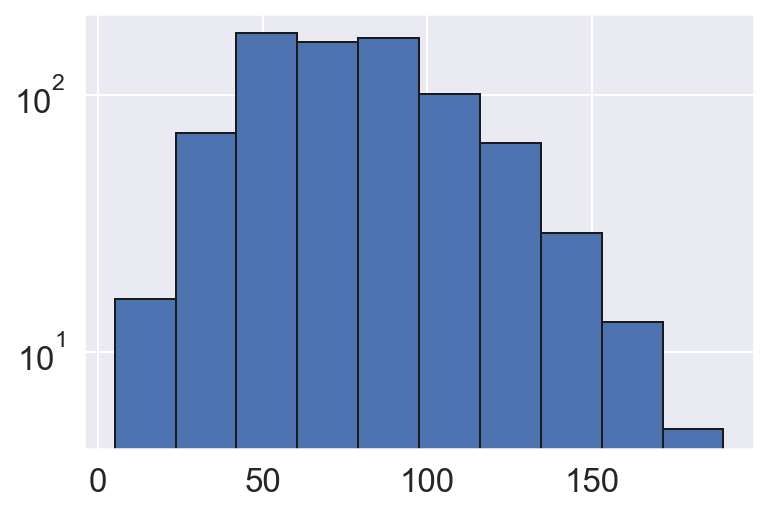

In [41]:
fig, ax = plt.subplots()
ax.bar(histogram[0][:-1], histogram[1], width=np.diff(histogram[0]), ec="k", align="edge")
ax.set_yscale('log')
plt.show()

### AS SQL!?


Working with DataFrames and SQL is as easy as creating a **temporary view**. In this way you define the table name to refer to in SQL-queries.

In [42]:
df.createOrReplaceTempView("pokedex")

In [43]:
pokedex = spark.sql("SELECT * FROM pokedex LIMIT 100")
pokedex.show(5)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            1|           Bulbasaur|GrassPoison|  318| 45|    49|     49|           65|            65|   45|
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            4|          Charmander|       Fire|  309| 39|    52|     43|           60|            50|   65|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
only showing top 5 

In [44]:
pokedex.toPandas()['Attack'].shape

(100,)

#### 1. Temporary Views select DataFrames
So the same transformations can be applied to DataFrames as we just learned.

In [45]:
pokedex.describe().show(truncate=5)

+-------+-------------+-----+-----+-----+-----+------+-------+-------------+--------------+-----+
|summary|PokedexNumber| Name| Type|Total|   HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------+-------------+-----+-----+-----+-----+------+-------+-------------+--------------+-----+
|  count|          100|  100|  100|  100|  100|   100|    100|          100|           100|  100|
|   mean|         44.8| null| null|39...|61.52| 71.69|  64.86|        68.21|         64.16|68.63|
|  st...|        27...| null| null|10...|21...| 24...|  28...|        32...|         23...|28...|
|    min|            1| Abra|  Bug|  195|   10|    20|     15|           15|            20|   15|
|    max|           92|Zubat|Wa...|  634|  140|   150|    180|          175|           120|  150|
+-------+-------------+-----+-----+-----+-----+------+-------+-------------+--------------+-----+



In [46]:
df.describe().show(truncate=5)

+-------+-------------+-----+-----+-----+-----+------+-------+-------------+--------------+-----+
|summary|PokedexNumber| Name| Type|Total|   HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------+-------------+-----+-----+-----+-----+------+-------+-------------+--------------+-----+
|  count|          800|  800|  800|  800|  800|   800|    800|          800|           800|  800|
|   mean|        36...| null| null|43...|69...| 79...|  73...|        72.82|         71...|68...|
|  st...|        20...| null| null|11...|25...| 32...|  31...|        32...|         27...|29...|
|    min|            1|Ab...|  Bug|  180|    1|     5|      5|           10|            20|    5|
|    max|          721|Zy...|Wa...|  780|  255|   190|    230|          194|           230|  180|
+-------+-------------+-----+-----+-----+-----+------+-------+-------------+--------------+-----+



#### 2. Check out the dataset with infer schema parameter but without header.
How does it work with / without?

In [47]:
#
df.printSchema()

root
 |-- PokedexNumber: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Total: integer (nullable = true)
 |-- HP: integer (nullable = true)
 |-- Attack: integer (nullable = true)
 |-- Defense: integer (nullable = true)
 |-- SpecialAttack: integer (nullable = true)
 |-- SpecialDefense: integer (nullable = true)
 |-- Speed: integer (nullable = true)



In [48]:
df.schema

StructType(List(StructField(PokedexNumber,IntegerType,true),StructField(Name,StringType,true),StructField(Type,StringType,true),StructField(Total,IntegerType,true),StructField(HP,IntegerType,true),StructField(Attack,IntegerType,true),StructField(Defense,IntegerType,true),StructField(SpecialAttack,IntegerType,true),StructField(SpecialDefense,IntegerType,true),StructField(Speed,IntegerType,true)))

#### 3.  Select the first 100 table rows using SQL
Then 
```SQL 
SELECT * FROM pokemon LIMIT 10
```

In [49]:
# first create an SQL context
sqlContext = ps.SQLContext(sc)

In [50]:
#
df.createOrReplaceTempView("pokemon")
sqlContext.sql("SELECT * FROM pokemon LIMIT 10").show()

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+
|            1|           Bulbasaur|GrassPoison|  318| 45|    49|     49|           65|            65|   45|
|            2|             Ivysaur|GrassPoison|  405| 60|    62|     63|           80|            80|   60|
|            3|            Venusaur|GrassPoison|  525| 80|    82|     83|          100|           100|   80|
|            3|VenusaurMega Venu...|GrassPoison|  625| 80|   100|    123|          122|           120|   80|
|            4|          Charmander|       Fire|  309| 39|    52|     43|           60|            50|   65|
|            5|          Charmeleon|       Fire|  405| 58|    64|     58|           80|            65|   80|
|            6|    

#### 4.a Which is the strongest Pokemon by `Type`?
Using Spark DataFrame operations.  Research Spark's "groupBy" functions.

In [51]:
count_df = df.select('Type', 'attack').groupBy(
    'Type').max().sort('max(attack)', ascending=False)
count_df.show(5)

+---------------+-----------+
|           Type|max(attack)|
+---------------+-----------+
|PsychicFighting|        190|
|    BugFighting|        185|
|        Psychic|        180|
|   DragonFlying|        180|
|     GroundFire|        180|
+---------------+-----------+
only showing top 5 rows



In [52]:
count_df.count()

154

In [53]:
count_df = count_df.withColumn('attack', count_df['max(attack)'])

In [54]:
count_df.show()

+---------------+-----------+------+
|           Type|max(attack)|attack|
+---------------+-----------+------+
|PsychicFighting|        190|   190|
|    BugFighting|        185|   185|
|     GroundFire|        180|   180|
|   DragonFlying|        180|   180|
|        Psychic|        180|   180|
|      DragonIce|        170|   170|
|   DragonGround|        170|   170|
|          Ghost|        165|   165|
|           Rock|        165|   165|
|       RockDark|        164|   164|
|      RockFairy|        160|   160|
|         Normal|        160|   160|
|   FireFighting|        160|   160|
|    PsychicDark|        160|   160|
|      WaterDark|        155|   155|
|      BugFlying|        155|   155|
|       BugSteel|        150|   150|
|      BugPoison|        150|   150|
|    WaterGround|        150|   150|
|     SteelGhost|        150|   150|
+---------------+-----------+------+
only showing top 20 rows



In [55]:
count_df.join(df, on=['Type', 'attack']).select(
    'Name', 'Type', 'attack').sort('attack', ascending=False).show(20)

+--------------------+---------------+------+
|                Name|           Type|attack|
+--------------------+---------------+------+
| MewtwoMega Mewtwo X|PsychicFighting|   190|
|HeracrossMega Her...|    BugFighting|   185|
|GroudonPrimal Gro...|     GroundFire|   180|
|RayquazaMega Rayq...|   DragonFlying|   180|
|  DeoxysAttack Forme|        Psychic|   180|
|  KyuremBlack Kyurem|      DragonIce|   170|
|GarchompMega Garc...|   DragonGround|   170|
| BanetteMega Banette|          Ghost|   165|
|           Rampardos|           Rock|   165|
|TyranitarMega Tyr...|       RockDark|   164|
|             Slaking|         Normal|   160|
|           Regigigas|         Normal|   160|
| DiancieMega Diancie|      RockFairy|   160|
|  HoopaHoopa Unbound|    PsychicDark|   160|
|BlazikenMega Blaz...|   FireFighting|   160|
|   PinsirMega Pinsir|      BugFlying|   155|
|GyaradosMega Gyar...|      WaterDark|   155|
|SwampertMega Swam...|    WaterGround|   150|
|   ScizorMega Scizor|       BugSt

#### 4.b Which is the strongest Pokemon by Type?
Using the Spark SQL temporary view.

In [56]:
#
sql = """
SELECT p.Name, tbl.Type, tbl.TotalMax
FROM (
    SELECT Type, MAX(attack) AS TotalMax
    FROM pokemon
    GROUP BY Type
) AS tbl 
LEFT OUTER JOIN pokemon AS p 
ON tbl.Type = p.Type AND tbl.TotalMax = p.attack
ORDER BY TotalMax DESC
LIMIT 10
"""
strongest_pokemon = sqlContext.sql(sql)
strongest_pokemon.show()

+--------------------+---------------+--------+
|                Name|           Type|TotalMax|
+--------------------+---------------+--------+
| MewtwoMega Mewtwo X|PsychicFighting|     190|
|HeracrossMega Her...|    BugFighting|     185|
|GroudonPrimal Gro...|     GroundFire|     180|
|  DeoxysAttack Forme|        Psychic|     180|
|RayquazaMega Rayq...|   DragonFlying|     180|
|GarchompMega Garc...|   DragonGround|     170|
|  KyuremBlack Kyurem|      DragonIce|     170|
|           Rampardos|           Rock|     165|
| BanetteMega Banette|          Ghost|     165|
|TyranitarMega Tyr...|       RockDark|     164|
+--------------------+---------------+--------+



#### 5.a Which Pokemon has the best combined Attack and Defence?
Using Spark DataFrame operations.

In [57]:
#
df.withColumn("Poketotal", df["Attack"] + df["Defense"]
              ).sort("Poketotal", ascending=0).show(5)

+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+---------+
|PokedexNumber|                Name|       Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|Poketotal|
+-------------+--------------------+-----------+-----+---+------+-------+-------------+--------------+-----+---------+
|          306|   AggronMega Aggron|      Steel|  630| 70|   140|    230|           60|            80|   50|      370|
|          208| SteelixMega Steelix|SteelGround|  610| 75|   125|    230|           55|            95|   30|      355|
|          383|GroudonPrimal Gro...| GroundFire|  770|100|   180|    160|          150|            90|   90|      340|
|          248|TyranitarMega Tyr...|   RockDark|  700|100|   164|    150|           95|           120|   71|      314|
|          713|             Avalugg|        Ice|  514| 95|   117|    184|           44|            46|   28|      301|
+-------------+--------------------+-----------+

#### 5.b Which Pokemon has the best combined Attack and Defence?
Using the Spark SQL temporary view.

In [58]:
#
sql = """
SELECT p.*, p.Attack + p.Defense AS Poketotal
FROM pokemon p
ORDER BY Poketotal DESC
LIMIT 10
"""
sqlContext.sql(sql).show(15)

+-------------+--------------------+---------------+-----+---+------+-------+-------------+--------------+-----+---------+
|PokedexNumber|                Name|           Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|Poketotal|
+-------------+--------------------+---------------+-----+---+------+-------+-------------+--------------+-----+---------+
|          306|   AggronMega Aggron|          Steel|  630| 70|   140|    230|           60|            80|   50|      370|
|          208| SteelixMega Steelix|    SteelGround|  610| 75|   125|    230|           55|            95|   30|      355|
|          383|GroudonPrimal Gro...|     GroundFire|  770|100|   180|    160|          150|            90|   90|      340|
|          248|TyranitarMega Tyr...|       RockDark|  700|100|   164|    150|           95|           120|   71|      314|
|          713|             Avalugg|            Ice|  514| 95|   117|    184|           44|            46|   28|      301|
|          377| 

#### 6. Create a new feature called "Pokevalue" that is the combined Attack, Defense and scaled by .2 of the Pokemon HP.

In [59]:
#
sql = """
SELECT p.*, (p.Attack + p.Defense) * (p.HP * .2) AS Pokevalue
FROM pokemon p
ORDER BY Pokevalue DESC
LIMIT 10
"""
sqlContext.sql(sql).show(truncate=15)

+-------------+---------------+---------------+-----+---+------+-------+-------------+--------------+-----+---------+
|PokedexNumber|           Name|           Type|Total| HP|Attack|Defense|SpecialAttack|SpecialDefense|Speed|Pokevalue|
+-------------+---------------+---------------+-----+---+------+-------+-------------+--------------+-----+---------+
|          289|        Slaking|         Normal|  670|150|   160|    100|           95|            65|  100|   7800.0|
|          383|GroudonPrima...|     GroundFire|  770|100|   180|    160|          150|            90|   90|   6800.0|
|          646|KyuremBlack ...|      DragonIce|  700|125|   170|    100|          120|            90|   95|   6750.0|
|          487|GiratinaAlte...|    GhostDragon|  680|150|   100|    120|          100|           120|   90|   6600.0|
|          487|GiratinaOrig...|    GhostDragon|  680|150|   120|    100|          120|           100|   90|   6600.0|
|          248|TyranitarMeg...|       RockDark|  700|100